In [214]:

#import necessary  libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from scipy import stats
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample
#Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [216]:
# Load the concrete Dataset

df = pd.read_csv("/Users/radhamahesh/Desktop/AI-ML Materials/concrete.csv")


df.head()


df.describe(include="all")

#shape of the data
df.shape

#datatype of each fields in the dataset
df.info()

#missing values check in the dataset
df.isna().apply(pd.value_counts)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
False,1030,1030,1030,1030,1030,1030,1030,1030,1030


In [217]:
df.isnull().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [154]:
#There are many zeros in 3 features, believe those are the missing value and have been entered as 0.
#Need to update the same
print(df[df==0].count(axis=0))
print("\nPercentage of zeros\n")
print(round(df[df==0].count(axis=0)/len(df.index)*100,2))

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

Percentage of zeros

cement           0.00
slag            45.73
ash             54.95
water            0.00
superplastic    36.80
coarseagg        0.00
fineagg          0.00
age              0.00
strength         0.00
dtype: float64


In [155]:
print('Range of values: ', df['cement'].max()- df['cement'].min())

Range of values:  438.0


In [156]:
print('Minimum age: ', df['cement'].min())
print('Maximum age: ',df['cement'].max())
print('Mean value: ', df['cement'].mean())
print('Median value: ',df['cement'].median())
print('Standard deviation: ', df['cement'].std())

Minimum age:  102.0
Maximum age:  540.0
Mean value:  281.1678640776698
Median value:  272.9
Standard deviation:  104.50636449481536


In [157]:
Q1=df['cement'].quantile(q=0.25)
Q3=df['cement'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['cement']))

1st Quartile (Q1) is:  192.375
3st Quartile (Q3) is:  350.0
Interquartile range (IQR) is  157.625


In [158]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in cement: ', L_outliers)
print('Upper outliers in cement: ', U_outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [159]:
print('Number of outliers in cement lower : ', df[df['cement']<-44.0625]['cement'].count())
print('% of Outlier in cement upper: ',round(df[df['cement']>586.4375]['cement'].count()*100/len(df)), '%')
print('% of Outlier in cement lower: ',round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)), '%')

Number of outliers in cement lower :  0
% of Outlier in cement upper:  0.0 %
% of Outlier in cement lower:  0.0 %


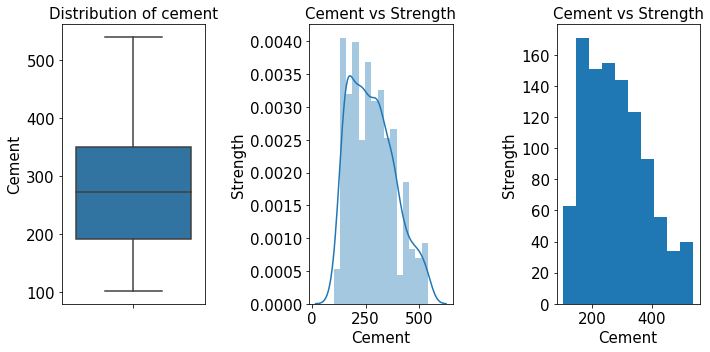

In [160]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(10,5))

#boxplot
sns.boxplot(x='cement',data=df,orient='v',ax=ax1)
ax1.set_ylabel('Cement', fontsize=15)
ax1.set_title('Distribution of cement', fontsize=15)
ax1.tick_params(labelsize=15)

#distplot
sns.distplot(df['cement'],ax=ax2)
ax2.set_xlabel('Cement', fontsize=15)
ax2.set_ylabel('Strength', fontsize=15)
ax2.set_title('Cement vs Strength', fontsize=15)
ax2.tick_params(labelsize=15)

#histogram
ax3.hist(df['cement'])
ax3.set_xlabel('Cement', fontsize=15)
ax3.set_ylabel('Strength', fontsize=15)
ax3.set_title('Cement vs Strength', fontsize=15)
ax3.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

cement


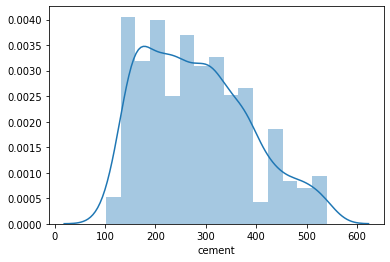

slag


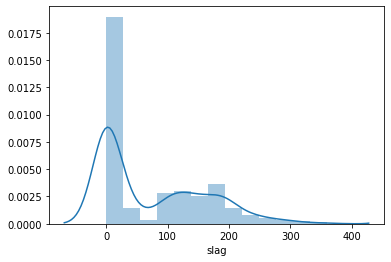

ash


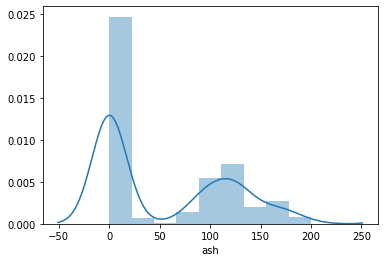

water


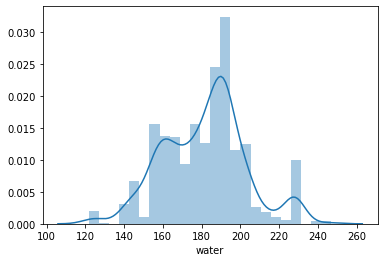

superplastic


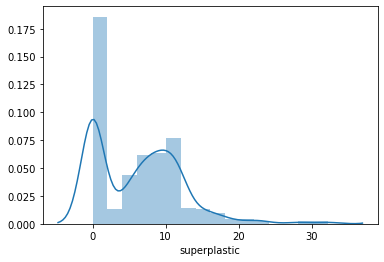

coarseagg


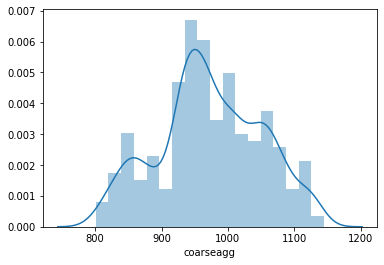

fineagg


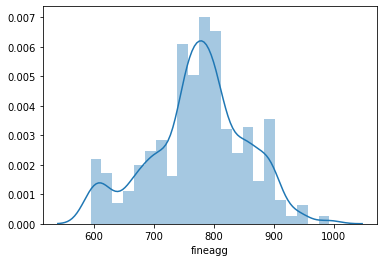

age


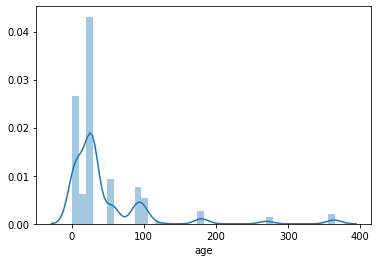

strength


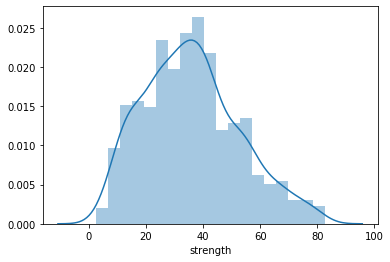

In [161]:
# cheking distribution of data
l = list(df.columns.values) 
def plot(df):
    
    for col in l:
        
        sns.distplot(df[col])
        print(col)
        plt.show()
    
    
plot(df)

cement


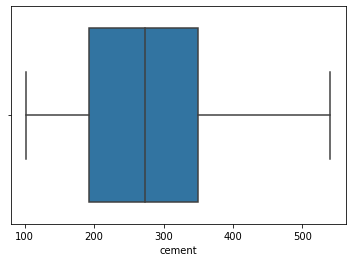

slag


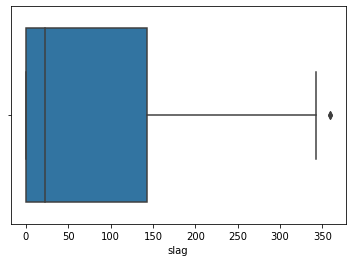

ash


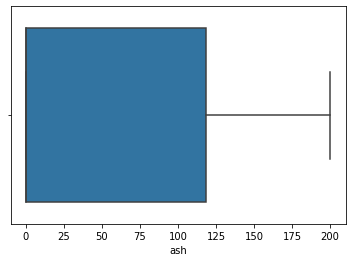

water


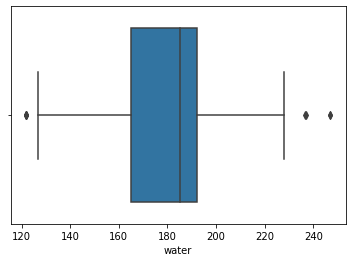

superplastic


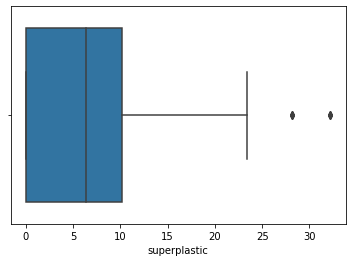

coarseagg


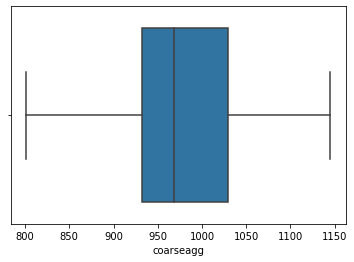

fineagg


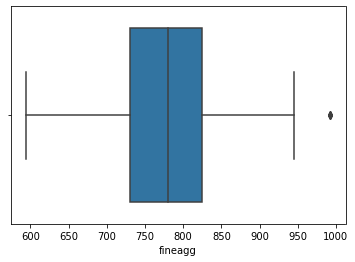

age


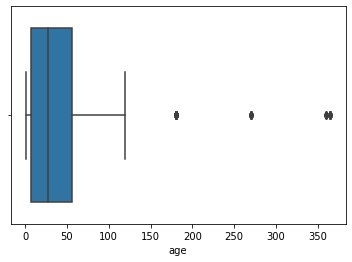

strength


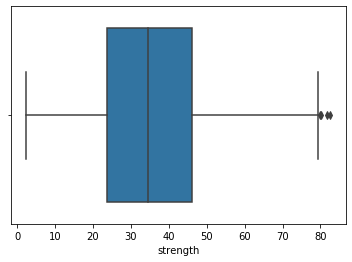

In [162]:
#seeing outliers in each variable

for col in l:
    
    sns.boxplot(df[col])
    print(col)
    plt.show()

In [163]:
df.quantile(0.02)

cement          133.0000
slag              0.0000
ash               0.0000
water           140.8000
superplastic      0.0000
coarseagg       822.0000
fineagg         594.0000
age               3.0000
strength          8.0348
Name: 0.02, dtype: float64

In [164]:
# now removing outliers..............

def outlier_range(data):

    df2 = df.copy()

    for col in l:
        df2[col] = df2[col].fillna(df2[col].mean())
        
        
    quantile_value1 = df2.quantile(0.02)
    quantile_value2 = df2.quantile(0.99)
    #index = quantile_value1.index.values
    
    for i in l:
        df2 = df2[(df2[i] >= quantile_value1[i]) & (df2[i] <= quantile_value2[i]) ]
    return df2

In [165]:
outlier_range(df)
df2 =  outlier_range(df)

cement


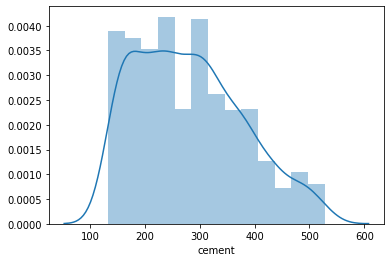

slag


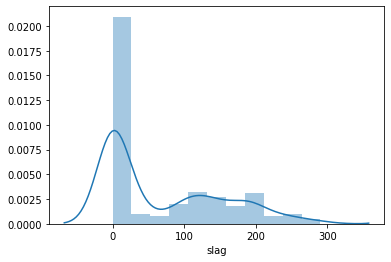

ash


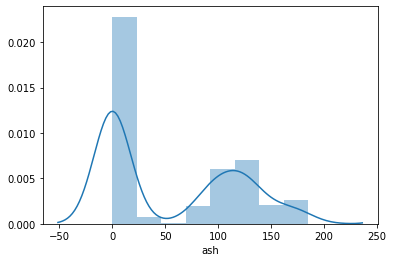

water


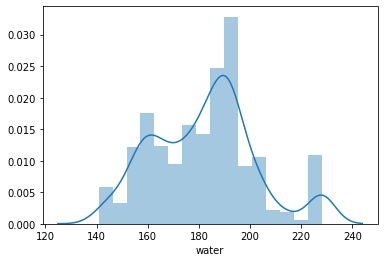

superplastic


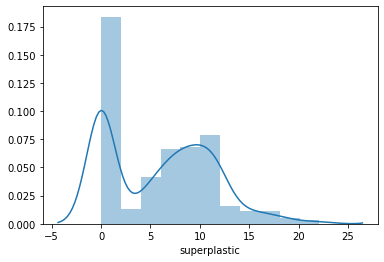

coarseagg


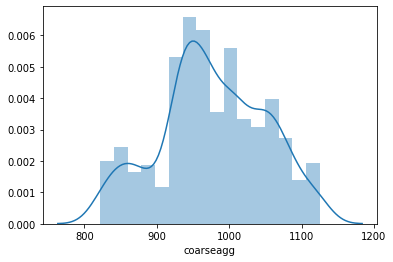

fineagg


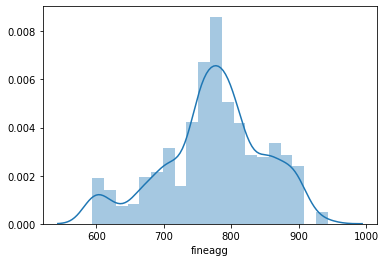

age


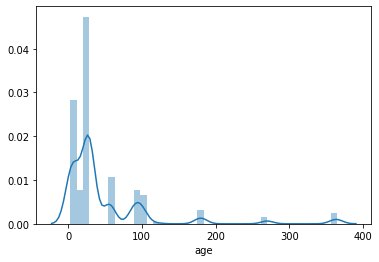

strength


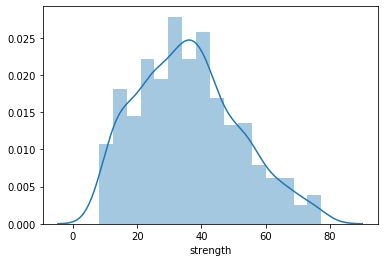

In [166]:

l = list(df.columns.values) 
def plot2(df2):
    
    for col in l:
        sns.distplot(df2[col])
        print(col)
        plt.show()
    
    
plot2(df2)

In [167]:
print('Range of values: ', df2['slag'].max()-df['slag'].min())

Range of values:  290.2


In [168]:
print('Minimum slag: ', df2['slag'].min())
print('Maximum slag: ',df2['slag'].max())
print('Mean value: ', df2['slag'].mean())
print('Median value: ',df2['slag'].median())
print('Standard deviation: ', df2['slag'].std())
print('Null values: ',df2['slag'].isnull().any())

Minimum slag:  0.0
Maximum slag:  290.2
Mean value:  68.2719337016575
Median value:  19.0
Standard deviation:  82.66238328067725
Null values:  False


In [169]:
Q1=df2['slag'].quantile(q=0.25)
Q3=df2['slag'].quantile(q=0.75)
print('1st Quartile (Q1) is: ', Q1)
print('3st Quartile (Q3) is: ', Q3)
print('Interquartile range (IQR) is ', stats.iqr(df2['slag']))

1st Quartile (Q1) is:  0.0
3st Quartile (Q3) is:  133.0
Interquartile range (IQR) is  133.0


In [170]:
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in slag: ', L_outliers)
print('Upper outliers in slag: ', U_outliers)

Lower outliers in slag:  -199.5
Upper outliers in slag:  332.5


In [171]:
print('Number of outliers in slag upper : ', df2[df2['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower : ', df2[df2['slag']<-214.425]['slag'].count())
print('% of Outlier in slag upper: ',round(df2[df2['slag']>357.375]['slag'].count()*100/len(df)), '%')
print('% of Outlier in slag lower: ',round(df2[df2['slag']<-214.425]['slag'].count()*100/len(df)), '%')

Number of outliers in slag upper :  0
Number of outliers in slag lower :  0
% of Outlier in slag upper:  0.0 %
% of Outlier in slag lower:  0.0 %


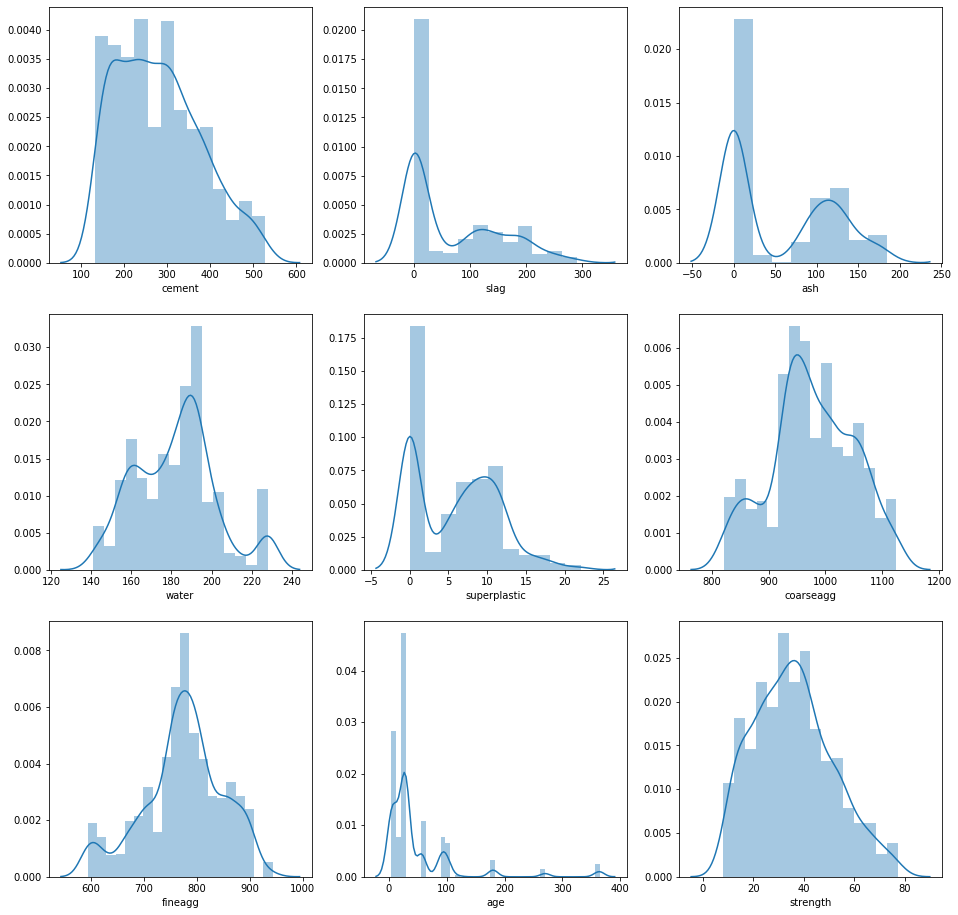

In [172]:
# Distplot
fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df2['cement'],ax=ax2[0][0])
sns.distplot(df2['slag'],ax=ax2[0][1])
sns.distplot(df2['ash'],ax=ax2[0][2])
sns.distplot(df2['water'],ax=ax2[1][0])
sns.distplot(df2['superplastic'],ax=ax2[1][1])
sns.distplot(df2['coarseagg'],ax=ax2[1][2])
sns.distplot(df2['fineagg'],ax=ax2[2][0])
sns.distplot(df2['age'],ax=ax2[2][1])
sns.distplot(df2['strength'],ax=ax2[2][2])

In [173]:
#Observations:

#Cement is almost normal.
#Slag has three gausssians and rightly skewed.
#Ash has two gaussians and rightly skewed.
#Water has three guassians and slighly left skewed.
#Superplastic has two gaussians and rightly skewed.
#Coarseagg has three guassians and almost normal.
#Fineagg has almost two guassians and looks like normal.
#Age has multiple guassians and rightly skewed.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a29a19b50>,
      dtype=object)

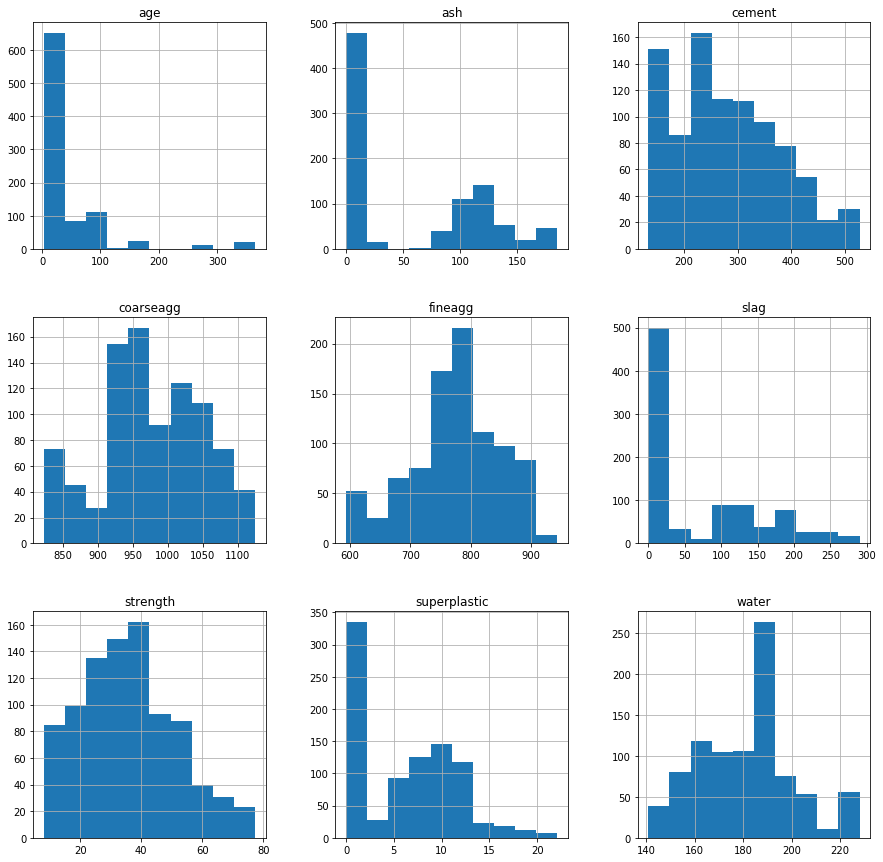

In [174]:
# Histogram 
df2.hist(figsize=(15,15))

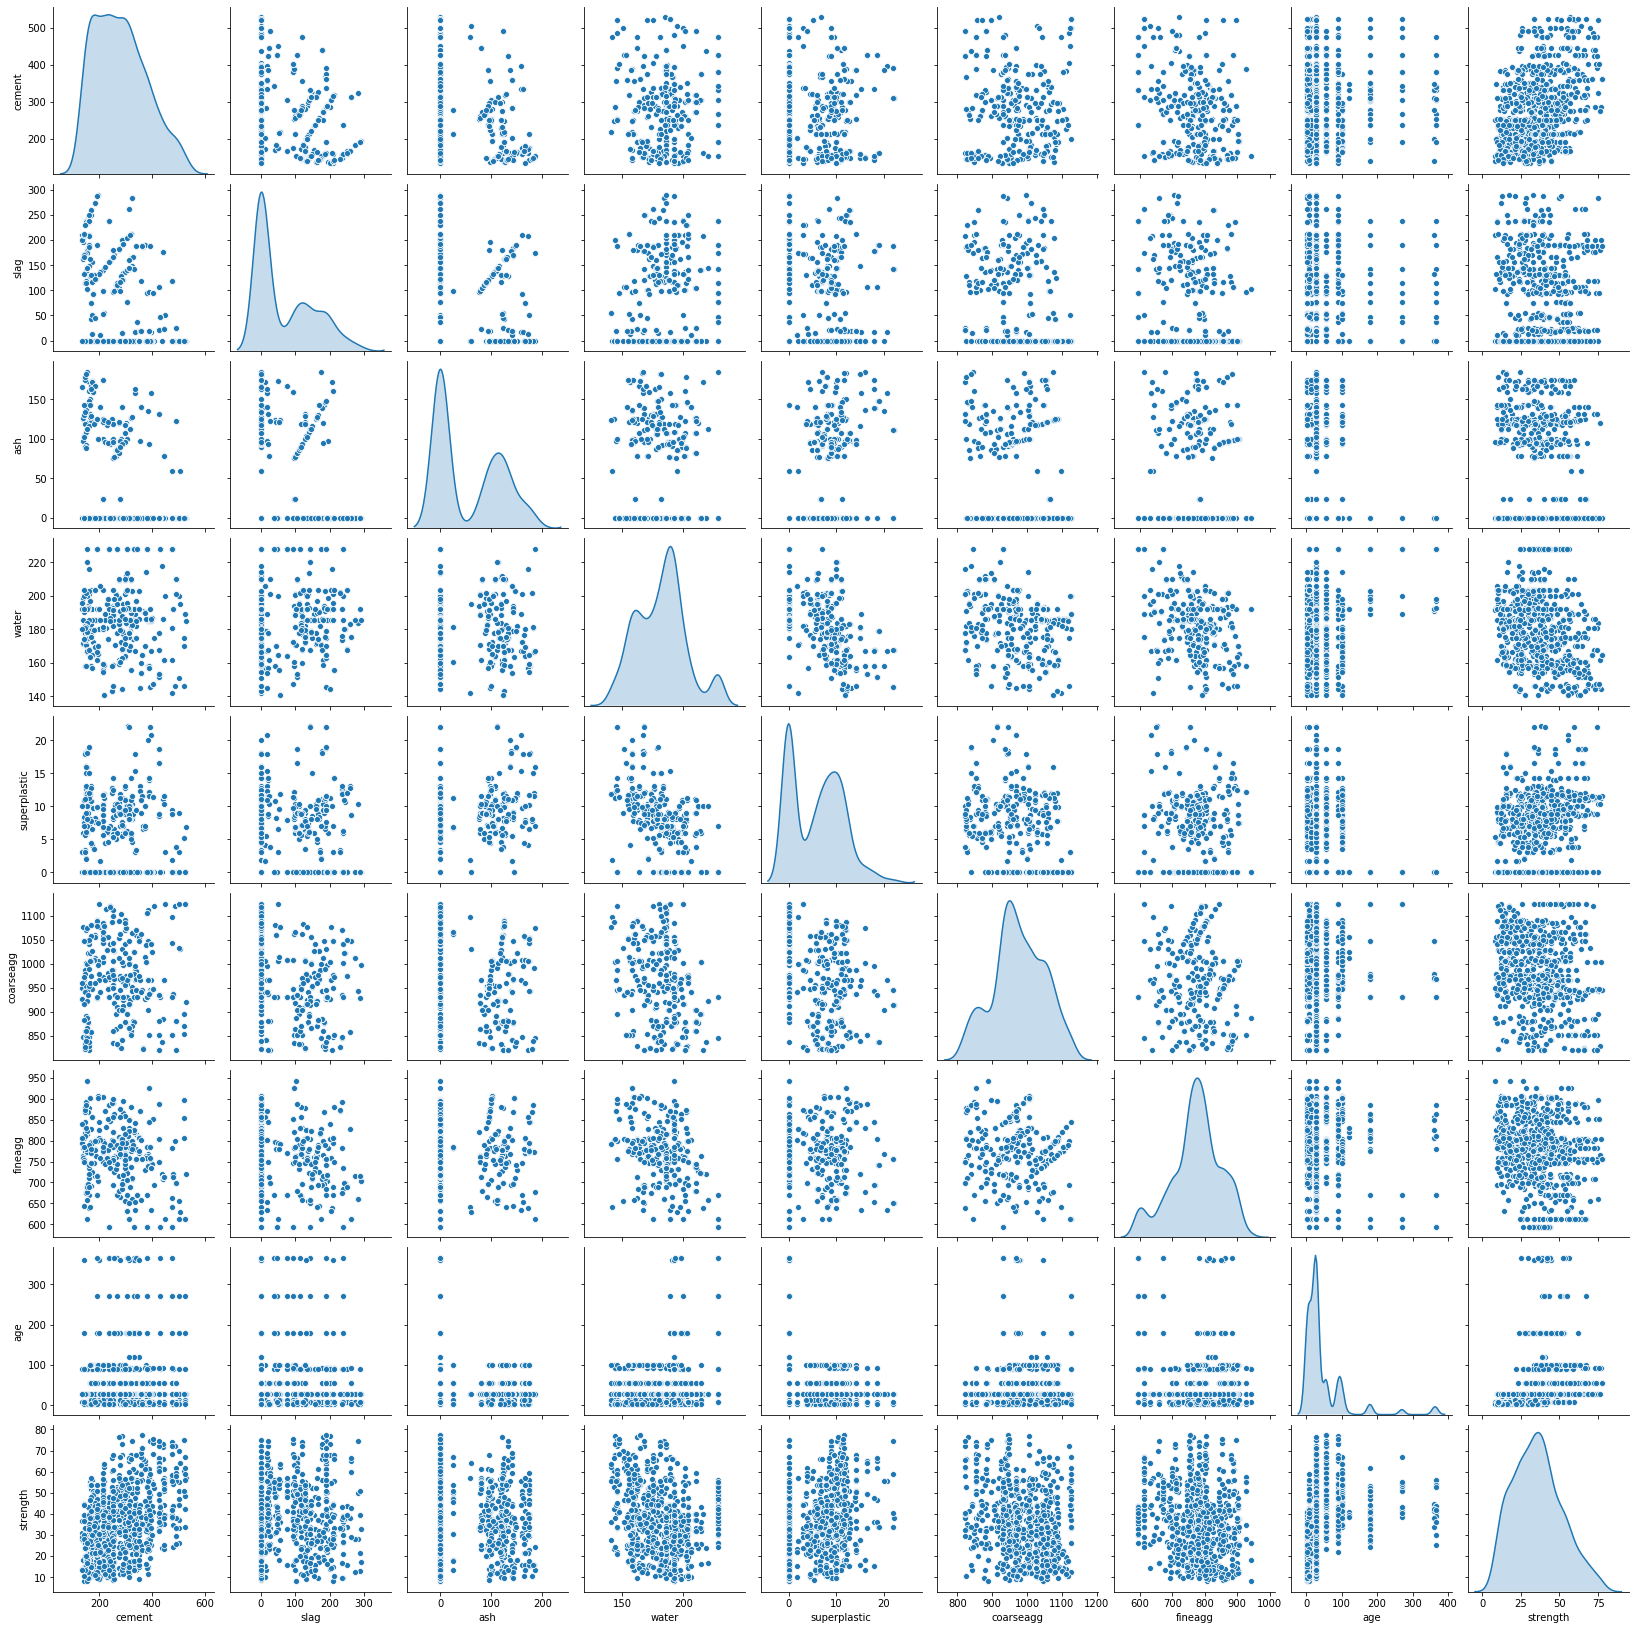

In [175]:
# pairplot- plot density curve instead of histogram in diagonal
sns.pairplot(df2, diag_kind='kde')

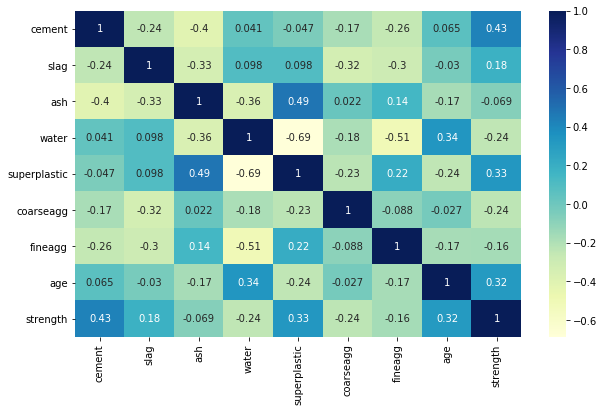

In [176]:
corr=df2.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,cmap='YlGnBu')

In [177]:
#cement vs other independent attributes: This attribute does not have any significant relation with slag, ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
#slag vs other independent attributes: This attribute also does not have any significant relation with ash, water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
#ash vs other independent attributes: This attribute also does not have any significant relation with water, superplatic, coarseagg,fineagg and age. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
#water vs other independent attributes: This attribute have negative linear relationship with superplastic and fineagg. It does not have any significant relationship with other independent atributes. This is true as Superplasticizers allows the reduction of water in the concrete upto the extent of 30% without reducing the workability.
#superplastic vs other independent attributes:This attribute have negative linear relationship with water only. It does not have any significant relationship with other independent attributes.
#coarseagg vs other independent attributes:This attribute also does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
#fineagg vs other independent attributes:It has negative linear relationship with water. It does not have any significant relation with any other attributes. It almost spread like a cloud. If we had calculated the r value it would have come close to 0.
#None of the independent attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

In [178]:
#Scaling the dataset
concrete_df_z = df2.apply(zscore)
concrete_df_z=pd.DataFrame(concrete_df_z,columns=df2.columns)

In [179]:
#independent and dependent variables
X=concrete_df_z.iloc[:,0:8]
y = concrete_df_z.iloc[:,8]

In [180]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [181]:

dt_model = DecisionTreeRegressor()
dt_model.fit(X_train , y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [182]:
#printing the feature importance
print('Feature importances: \n',pd.DataFrame(dt_model.feature_importances_,columns=['Imp'],index=X_train.columns))

Feature importances: 
                    Imp
cement        0.348105
slag          0.081527
ash           0.032216
water         0.114386
superplastic  0.047722
coarseagg     0.036184
fineagg       0.024490
age           0.315371


In [183]:
y_pred = dt_model.predict(X_test)
# performance on train data
print('Performance on training data using DT:',dt_model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using DT:',dt_model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using DT: 0.993705539937901
Performance on testing data using DT: 0.7912528101548715
Accuracy DT:  0.7912528101548715
MSE:  0.18938265103593835


In [184]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed)
results1 = cross_val_score(dt_model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.831473054768775
Standard Deviation:  0.047057442039208995


In [185]:
concrete_df_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 1028
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        905 non-null    float64
 1   slag          905 non-null    float64
 2   ash           905 non-null    float64
 3   water         905 non-null    float64
 4   superplastic  905 non-null    float64
 5   coarseagg     905 non-null    float64
 6   fineagg       905 non-null    float64
 7   age           905 non-null    float64
 8   strength      905 non-null    float64
dtypes: float64(9)
memory usage: 110.7 KB


In [186]:
from sklearn.model_selection import train_test_split
concrete_train,concrete_test=train_test_split(df2,train_size=0.7,random_state=100)

In [187]:
concrete_train.shape

(633, 9)

In [188]:
#Doing Scaling of the variables
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [189]:
#To train dataset
concrete_train_scl=scaler.fit_transform(concrete_train)

#To test Dataset
concrete_test_scl=scaler.transform(concrete_test)

In [190]:
concrete_train_scl=pd.DataFrame(concrete_train_scl,columns=concrete_train.columns)
concrete_test_scl=pd.DataFrame(concrete_test_scl,columns=concrete_test.columns)

In [191]:
#X Y split of train data
X_concrete_train=concrete_train_scl.drop(['strength'],axis=1)
Y_concrete_train=concrete_train_scl['strength']

#X Y split of test data
X_concrete_test=concrete_test_scl.drop(['strength'],axis=1)
Y_concrete_test=concrete_test_scl['strength']

In [192]:
# Linear Regression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [193]:
#Add constant
X_concrete_train_1=sm.add_constant(X_concrete_train)

In [194]:
lm1=sm.OLS(Y_concrete_train,X_concrete_train_1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     119.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):          1.06e-120
Time:                        02:01:57   Log-Likelihood:                -603.79
No. Observations:                 633   AIC:                             1226.
Df Residuals:                     624   BIC:                             1266.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         5.013e-16      0.025   1.99e-14   

In [195]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_concrete_train_1.columns
vif['VIF'] = [variance_inflation_factor(X_concrete_train_1.values, i) for i in range(X_concrete_train_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,water,7.92
2,slag,7.13
7,fineagg,6.60
1,cement,6.58
3,ash,5.94
6,coarseagg,5.00
5,superplastic,3.49
8,age,1.12
0,const,1.00


In [196]:
#dropping slag, there is no significant change.
X_concrete_train_2 = X_concrete_train.drop(['slag'],axis=1)

#ITERATION 6
lm2=sm.OLS(Y_concrete_train,X_concrete_train_2).fit()
print(lm2.summary())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_concrete_train_2.columns
vif['VIF'] = [variance_inflation_factor(X_concrete_train_2.values, i) for i in range(X_concrete_train_2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                                 OLS Regression Results                                
Dep. Variable:               strength   R-squared (uncentered):                   0.586
Model:                            OLS   Adj. R-squared (uncentered):              0.582
Method:                 Least Squares   F-statistic:                              126.7
Date:                Thu, 01 Oct 2020   Prob (F-statistic):                   1.50e-115
Time:                        02:01:58   Log-Likelihood:                         -618.86
No. Observations:                 633   AIC:                                      1252.
Df Residuals:                     626   BIC:                                      1283.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

,Features,VIF
2,water,4.58
3,superplastic,3.48
5,fineagg,1.97
4,coarseagg,1.86
1,ash,1.63
0,cement,1.50
6,age,1.11


In [197]:
#Trying RFE
# Import RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# RFE with 6 features
lm3 = LinearRegression()
rfe1 = RFE(lm3, 6)

# Fit with 6 features
rfe1.fit(X_concrete_train, Y_concrete_train)

# Print the boolean results
print(rfe1.support_)           
print(rfe1.ranking_)

[ True  True  True  True False  True False  True]
[1 1 1 1 3 1 2 1]


In [198]:
# Subset the features selected by rfe1
col1 = X_concrete_train.columns[rfe1.support_]

# Subsetting training data for 6 selected columns
X_train_rfe1 = X_concrete_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,cement,slag,ash,water,coarseagg,age
0,1.0,-0.436680,2.019697,-0.907634,2.259348,-0.610320,2.147225
1,1.0,-1.003197,-0.821500,1.734171,-0.607781,1.073420,-0.500099
2,1.0,-0.795171,-0.689908,1.322872,1.179265,-0.474095,-0.675524
3,1.0,0.749877,-0.594204,0.626827,-1.815511,-0.133533,-0.276831
4,1.0,-1.168810,-0.821500,1.364002,-0.892530,0.392296,-0.675524


In [199]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,ash,2.18
2,slag,1.90
1,cement,1.89
5,coarseagg,1.48
4,water,1.39
6,age,1.12
0,const,1.00


Text(0.5, 0, 'Errors')

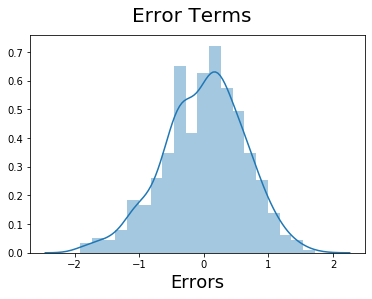

In [200]:
#Error term is normally distributed
Y_concrete_train_predict = lm1.predict(X_concrete_train_1)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((Y_concrete_train - Y_concrete_train_predict), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [201]:
#Making Predictions
# Add a constant to the test set created
X_test = sm.add_constant(X_concrete_test)
X_test.info()

# Making predictions
y_pred = lm1.predict(X_test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         272 non-null    float64
 1   cement        272 non-null    float64
 2   slag          272 non-null    float64
 3   ash           272 non-null    float64
 4   water         272 non-null    float64
 5   superplastic  272 non-null    float64
 6   coarseagg     272 non-null    float64
 7   fineagg       272 non-null    float64
 8   age           272 non-null    float64
dtypes: float64(9)
memory usage: 19.2 KB


Text(0, 0.5, 'y_pred')

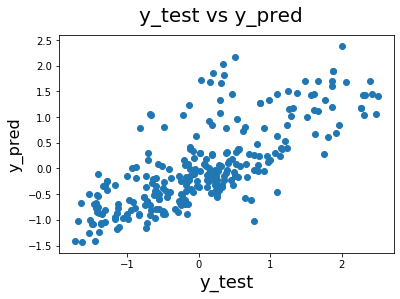

In [202]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
plt.scatter(Y_concrete_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [203]:
# r2_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
print("R-square: ",r2_score(Y_concrete_test, y_pred))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_pred)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_pred))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_pred))

R-square:  0.5528278802050826
Root Mean square error:  0.6552146202882515
Mean square error:  0.4293061986394776
Mean absolute error:  0.5158648463613147


In [204]:
#Ridge Regression
from sklearn.linear_model import Ridge

In [205]:
#define model
Ridge_model_1=Ridge()
#training model
Ridge_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_Ridge_pred_1 = Ridge_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_Ridge_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_Ridge_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_Ridge_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_Ridge_pred_1))


R2 score :  0.5526783199785354
Root Mean square error:  0.6553241819652436
Mean square error:  0.42944978346841567
Mean absolute error:  0.5161665529271677


In [206]:
#Lasso Regression
from sklearn.linear_model import Lasso

In [207]:
#define model
Lasso_model_1=Lasso(alpha=0.001, max_iter=1000)
#training model
Lasso_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_Lasso_pred_1 = Lasso_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_Lasso_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_Lasso_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_Lasso_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_Lasso_pred_1))

R2 score :  0.5530666585251247
Root Mean square error:  0.6550396631183479
Mean square error:  0.4290769602581987
Mean absolute error:  0.5159290175771939


In [208]:
#Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

pipeline = Pipeline([('poly',PolynomialFeatures(degree=2)),('lr', LinearRegression())])
pipeline.fit(X_concrete_train, Y_concrete_train)
y_poly_pred = pipeline.predict(X_concrete_test)

print("R-square: ",r2_score(Y_concrete_test, y_poly_pred))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_poly_pred)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_poly_pred))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_poly_pred))

R-square:  0.7455515489378237
Root Mean square error:  0.49424937195820307
Mean square error:  0.24428244168107818
Mean absolute error:  0.37640097514764553


In [209]:
#Random Forest Regressor
#define model
RF_model_1=RandomForestRegressor()
#training model
RF_model_1.fit(X_concrete_train,Y_concrete_train)
#predicting result over test data
y_RF_pred_1 = RF_model_1.predict(X_concrete_test)
#Results
print("R2 score : " , r2_score(Y_concrete_test,y_RF_pred_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_RF_pred_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_RF_pred_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_RF_pred_1))

#Feature Importance
dt_imp_feature_1=pd.DataFrame(RF_model_1.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_1.sort_values(by="Imp",ascending=False)

R2 score :  0.8957592647096674
Root Mean square error:  0.3163478982587564
Mean square error:  0.10007599273273249
Mean absolute error:  0.21443978968156654


,Imp
age,0.361940
cement,0.238272
water,0.108631
superplastic,0.108191
slag,0.078250
fineagg,0.052087
coarseagg,0.035473
ash,0.017156


In [210]:
#Tunning of Random Forest
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

skf = KFold(n_splits=5, random_state=1)

In [211]:
RF_model_3 = RandomForestRegressor()

params = {"n_estimators": np.arange(10,16,2),"max_depth": np.arange(5, 9,1),
          "max_features":np.arange(5,8,1),'min_samples_leaf': range(4, 12, 2),
    'min_samples_split': range(20, 26, 2)}

RF_GV_1 = GridSearchCV(estimator = RF_model_3, param_grid = params,cv=skf,verbose=1,return_train_score=True)

RF_GV_1.fit(X_concrete_train,Y_concrete_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2160 out of 2160 | elapsed:  1.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=False),
             error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_es...one,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=Fa

In [212]:
# results of grid search CV
RF_results = pd.DataFrame(RF_GV_1.cv_results_)


#parameters best value
best_score_rf = RF_GV_1.best_score_
best_rf = RF_GV_1.best_params_
best_rf

{'max_depth': 8,
 'max_features': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 20,
 'n_estimators': 14}

In [213]:
rf_best = RandomForestRegressor(max_depth= 8, max_features= 6,n_estimators=12,min_samples_leaf=8,min_samples_split=20)

rf_best.fit(X_concrete_train, Y_concrete_train)
# predict
y_pred_rf_1 = rf_best.predict(X_concrete_test)

#Results
print("R2 score : " , r2_score(Y_concrete_test,y_pred_rf_1))
print("Root Mean square error: ",np.sqrt(mean_squared_error(Y_concrete_test, y_pred_rf_1)))
print("Mean square error: ",mean_squared_error(Y_concrete_test, y_pred_rf_1))
print("Mean absolute error: ",mean_absolute_error(Y_concrete_test, y_pred_rf_1))

#Feature Importance
dt_imp_feature_2=pd.DataFrame(rf_best.feature_importances_, columns = ["Imp"], index = X_concrete_test.columns)
dt_imp_feature_2.sort_values(by="Imp",ascending=False)

R2 score :  0.8338066223669148
Root Mean square error:  0.39944140214852436
Mean square error:  0.15955343375037917
Mean absolute error:  0.297366638625586


,Imp
age,0.382545
cement,0.269886
water,0.125912
superplastic,0.085218
slag,0.074517
fineagg,0.026992
coarseagg,0.017597
ash,0.017333
